### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# Get column and type
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data.shape
# data['car'].value_counts()
# total 12684 row, we need to start clean data
# First is car, the missing value will be 12576
# I prefer to drop this column, since it does not have enough data to show relationship with coupoin acceptance 
data = data.copy()
data = data.drop('car', axis=1)
data.head(1)
data.isnull().sum()
# Deal with Bar
data['Bar'].unique()
# Since value of Bar will be never', 'less1', '1~3', 'gt8', nan, '4~8', I plan to fill mode value
bar_mode = data['Bar'].mode()[0]
data['Bar'] = data['Bar'].fillna(bar_mode)
data['Bar'].value_counts()
# Similarly for CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
display(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [7]:
# To get proportion of total obervations chose to accept the coupon, 
# need to caluate Y column's prcentage of value = 1
coupon_accept_rate = data['Y'].value_counts(normalize=True)
accept_rate = coupon_accept_rate[1] * 100
print(f"Coupon acceptance rate: {accept_rate:.1f}%")
# The acceptance rate is 56.8%


Coupon acceptance rate: 56.8%


5. Use a bar plot to visualize the `coupon` column.

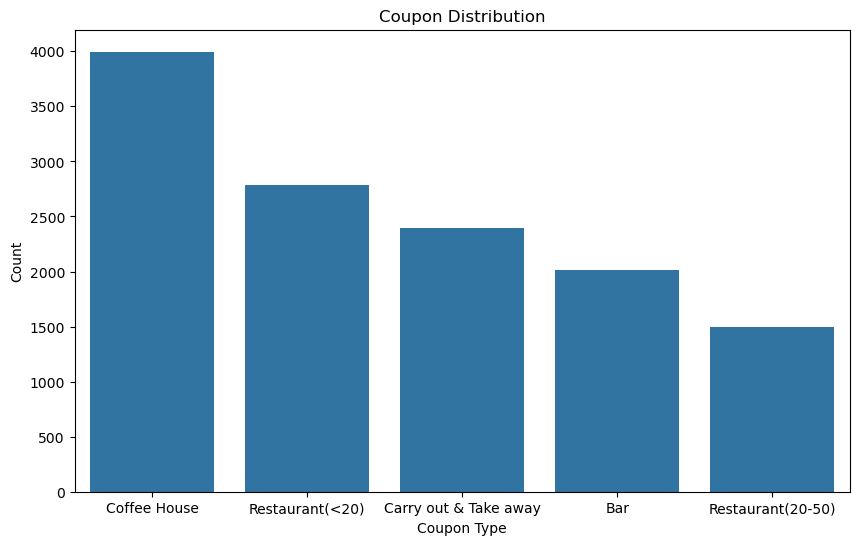

In [8]:
# Use sns bar plot to visualize the coupon column.
# x will be coupoin type, y will be count
plt.figure(figsize=(10, 6))
# Use a bar plot to visualize the coupon column
sns.barplot(x=data['coupon'].value_counts().index, y=data['coupon'].value_counts().values)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Distribution')
plt.show()

6. Use a histogram to visualize the temperature column.

temperature
30    2316
55    3840
80    6528
Name: count, dtype: int64

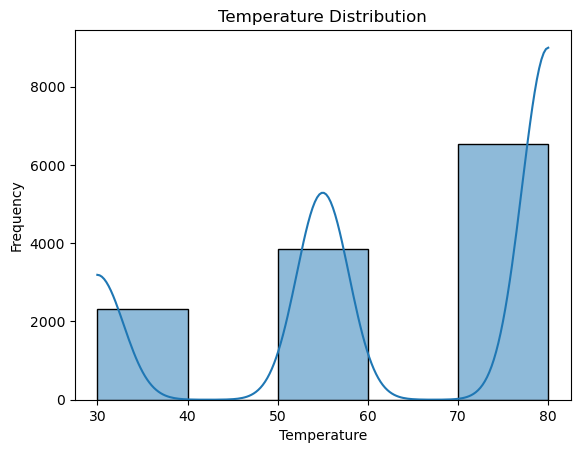

In [9]:
# Get value for 'temperature'
display(data['temperature'].value_counts().sort_index())
# Since it only have 3 values, put into 5 bin
sns.histplot(data['temperature'], bins=5, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
print(data['coupon'].value_counts())
df_bar = data[data['coupon'] == 'Bar']
df_bar.sample(2)

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2240,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Married partner,...,less1,gt8,4~8,never,1,0,0,1,0,0
10952,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,31,Married partner,...,less1,gt8,4~8,less1,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [11]:
accept_arr = df_bar['Y'].value_counts(normalize=True)
accept_rate = accept_arr[1] * 100
print(accept_rate)
# Accept rate for bar coupon is 41%

41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
print(df_bar['Bar'].value_counts())
# Caculate acceptance rate for vising 3 times or less in a month
group_with_less_visit = df_bar[df_bar['Bar'].isin(['never', 'less1', '1~3'])]
group_with_less_visit_accept_rate = group_with_less_visit['Y'].value_counts(normalize=True)[1] * 100
# Caculate acceptance rate for vising more than 3 times
group_with_more_visit = df_bar[df_bar['Bar'].isin(['4~8', 'gt8'])]
group_with_more_visit_accept_rate = group_with_more_visit['Y'].value_counts(normalize=True)[1] * 100
# print result
print(f"acceptance rate for who went to a bar 3 or fewer is {group_with_less_visit_accept_rate:.0f}%")
print(f"acceptance rate for who went to more than 3 is {group_with_more_visit_accept_rate:.0f}%")

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
acceptance rate for who went to a bar 3 or fewer is 37%
acceptance rate for who went to more than 3 is 77%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
# Get age value
print(df_bar['age'].value_counts())
# Since age is object, need to typecast to int, but it has value as below21 and 50plus, I need to map manually
age_mapping = {
    'below21': 20,  # Map 'below21' to 20
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 51  # Assume '50plus' is mapped to 51 
}
df_bar.loc[:,'age_numeric'] = df_bar['age'].map(age_mapping)
group_bar_more_than_once_and_over_25 = df_bar[df_bar['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_bar['age_numeric'] > 25)]
accept_rate_for_bar_more_than_once_and_over_25 = group_bar_more_than_once_and_over_25['Y'].value_counts(normalize=True)[1] * 100
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is {accept_rate_for_bar_more_than_once_and_over_25:.0f}%")
# Work on others e.g go to bar once but age is less or equal to 25
group_bar_more_than_once_and_others = df_bar[df_bar['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_bar['age_numeric'] <= 25)]
accept_rate_for_bar_more_than_once_and_others = group_bar_more_than_once_and_others['Y'].value_counts(normalize=True)[1] * 100
print(f"Acceptance rate for drivers who go to a bar more than once a month and are not over the age of 25 is {accept_rate_for_bar_more_than_once_and_others:.0f}%")

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64
Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 70%
Acceptance rate for drivers who go to a bar more than once a month and are not over the age of 25 is 67%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [18]:
# Copy data
df_5 = df_bar.copy()
# Driver go to bar more than once
df_5_bar_more_than_once = df_5[df_5['Bar'].isin(['1~3', '4~8', 'gt8'])]
# Driver had passageners that were not a kid
# print(df_5['passanger'].unique())
df_5_not_kid = df_5[df_5['passanger'] != 'Kid(s)']
# Driver had occoupations other than farming, fishing or forestry
# print(df_5['occupation'].unique())
df_5_not_farming_fishing_forestry = df_5[df_5['occupation'] != 'Farming Fishing & Forestry']
# Campre rate
accept_rate_more_than_once = df_5_bar_more_than_once['Y'].mean() * 100
accept_rate_not_kid = df_5_not_kid['Y'].mean() * 100
accept_rate_not_farming_fishing_forestry = df_5_not_farming_fishing_forestry['Y'].mean() * 100
print(f'accept rate for drivers who go to bars more than once a month is {accept_rate_more_than_once:.0f}%')
print(f'accept rate for drivers who had passengers that were not a kid is {accept_rate_not_kid:.0f}%')
print(f'accept rate for drivers who had occpupations other than farming, fishing or foresty is {accept_rate_not_farming_fishing_forestry:.0f}%')


accept rate for drivers who go to bars more than once a month is 69%
accept rate for drivers who had passengers that were not a kid is 43%
accept rate for drivers who had occpupations other than farming, fishing or foresty is 41%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [19]:
df_6 = df_bar.copy()
# apply age mapping
age_mapping = {
    'below21': 20,  # Map 'below21' to 20
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 51  # Assume '50plus' is mapped to 51
}
df_6.loc[:,'age_numeric'] = df_6['age'].map(age_mapping)
# Get go to bars more than once a month, had passengers that were not a kid, and were not widowed
print(df_6['maritalStatus'].unique())
df_6_bar_more_than_once_not_kid_not_widowed = df_6[(df_6['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_6['passanger'] != 'Kid(s)') & (df_6['maritalStatus'] != 'Widowed')]
# Get go to bars more than once a month and are under the age of 30 OR
df_6_bar_more_than_once_under_30 = df_6[(df_6['Bar'].isin(['1~3', '4~8', 'gt8']) & (df_6['age_numeric'] < 30))]
# Get go to cheap restaurants more than 4 times a month and income is less than 50K.
print(df_6['RestaurantLessThan20'].unique())
print(df_6['income'].unique())
df_6_cheap_restaurant_more_than_4_income_less_than_50k = df_6[(df_6['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (df_6['income'].isin(['$37500 - $49999']))]
accept_rate_more_than_once_not_kid_not_widowed = df_6_bar_more_than_once_not_kid_not_widowed['Y'].mean() * 100
accept_rate_more_than_once_under_30 = df_6_bar_more_than_once_under_30['Y'].mean() * 100
accept_rate_cheap_restaurant_more_than_4_income_less_than_50k = df_6_cheap_restaurant_more_than_4_income_less_than_50k['Y'].mean() * 100
print(f'accept rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed is {accept_rate_more_than_once_not_kid_not_widowed:.0f}%')
print(f'accept rate for go to bars more than once a month and are under the age of 30 is {accept_rate_more_than_once_under_30:.0f}%')
print(f'accept rate for go to cheap restaurants more than 4 times a month and income is less than 50K is {accept_rate_cheap_restaurant_more_than_4_income_less_than_50k:.0f}%')


['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
accept rate for go to bars more than once a month, had passengers that were not a kid, and were not widowed is 71%
accept rate for go to bars more than once a month and are under the age of 30 is 72%
accept rate for go to cheap restaurants more than 4 times a month and income is less than 50K is 49%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [20]:
print(f"""
My hypothesis is that:
1. Drivers who frequently go to bars are much more likely to accept bar coupons. Regular bar-goers seem to be the primary target audience for bar coupons.
2. Age is not a major factor in coupon acceptance; both younger and older adults show similar acceptance rates.
3. Occupation plays a role in coupon acceptance, possibly linked to lifestyle or social habits. Drivers in non-manual labor occupations might be less inclined to accept bar coupons, though further analysis would be needed.
4. Drivers with fewer family or social constraints (no kids, not widowed) are more likely to accept bar coupons.
5. Younger adults (under 30) are slightly more receptive to bar coupons.
6. Price-sensitive drivers who frequently eat out at cheap restaurants are moderately likely to accept bar coupons.
Therefore, Frequent bar-goers are the most likely to accept bar coupons, especially when they are under 30 and have no family-related constraints (e.g., no kids).
Social context (presence of passengers, occupation) and lifestyle factors (restaurant visits and income) also play a role, though they appear to have a more moderate impact compared to bar-going frequency.
Younger adults and those with a socially active lifestyle are strong candidates for bar coupons.
""")


My hypothesis is that:
1. Drivers who frequently go to bars are much more likely to accept bar coupons. Regular bar-goers seem to be the primary target audience for bar coupons.
2. Age is not a major factor in coupon acceptance; both younger and older adults show similar acceptance rates.
3. Occupation plays a role in coupon acceptance, possibly linked to lifestyle or social habits. Drivers in non-manual labor occupations might be less inclined to accept bar coupons, though further analysis would be needed.
4. Drivers with fewer family or social constraints (no kids, not widowed) are more likely to accept bar coupons.
5. Younger adults (under 30) are slightly more receptive to bar coupons.
6. Price-sensitive drivers who frequently eat out at cheap restaurants are moderately likely to accept bar coupons.
Therefore, Frequent bar-goers are the most likely to accept bar coupons, especially when they are under 30 and have no family-related constraints (e.g., no kids).
Social context (prese

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

- I will using similar way to analysis carry out and take-away coupon acceptance rate for different group 

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
accept rate for age is less than 30 is 74%
accept rate for age is more than 50 is 75%
accept rate for age is more than 60 is 77%


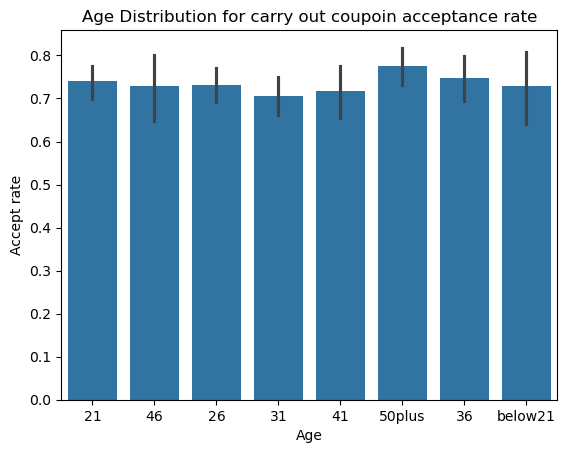

In [26]:
# setup df for coupon is 
print(data['coupon'].unique())
df_carry = data[data['coupon'] == 'Carry out & Take away'].copy()
# First see accept rate for age is less than 30 and beyond
age_mapping = {
    'below21': 20,  # Map 'below21' to 20
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 51  # Assume '50plus' is mapped to 51
}
df_carry.loc[:,'age_numeric'] = df_carry['age'].map(age_mapping)
df_carry_less_than_30 = df_carry[df_carry['age_numeric'] < 30]
accept_rate_df_carry_less_than_30 = df_carry_less_than_30['Y'].mean() * 100
df_carry_more_than_40 = df_carry[df_carry['age_numeric'] >= 40]
df_carry_more_than_50 = df_carry[df_carry['age_numeric'] >= 50]
accept_rate_df_carry_more_than_40 = df_carry_more_than_40['Y'].mean() * 100
accept_rate_df_carry_more_than_50 = df_carry_more_than_50['Y'].mean() * 100
print(f'accept rate for age is less than 30 is {accept_rate_df_carry_less_than_30:.0f}%')
print(f'accept rate for age is more than 50 is {accept_rate_df_carry_more_than_40:.0f}%')
print(f'accept rate for age is more than 60 is {accept_rate_df_carry_more_than_50:.0f}%')
# bar plot x is age, y is count for accept the coupon
sns.barplot(x='age', y = 'Y', data=df_carry)
plt.xlabel('Age')
plt.ylabel('Accept rate')
plt.title('Age Distribution for carry out coupoin acceptance rate')
plt.show()